In [2]:
import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('tmp_matrices/g.pt').to(device)
concept_g = torch.load('tmp_matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("tmp_matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('tmp_matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

/home/itai/research/linear_rep_geometry/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_163997/3088499159.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you

In [11]:
# filenames = ["paired_contexts/en-fr.jsonl",
#              "paired_contexts/fr-de.jsonl",
#              "paired_contexts/fr-es.jsonl",
#              "paired_contexts/es-de.jsonl"]

filenames = []
with open(f"tmp_matrices/filenames.txt", "r") as f:
    for line in f.readlines():
        filenames.append(line.strip())
filenames

['/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Achievement(Positive) - Achievement(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Benevolence(Positive) - Benevolence(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Conformity(Positive) - Conformity(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Hedonism(Positive) - Hedonism(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Power(Positive) - Power(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Security(Positive) - Security(Negative)].txt',
 '/home/itai/research/linear_rep_geometry/data/ValueNet/schwartz/pos2neg/norm_sentence_structure/[Self-direction(Positiv

In [6]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[0])
lrg.hist_measurement(
    lambda_0 @ sqrt_Cov_gamma,
    lambda_1 @ sqrt_Cov_gamma,
    concept_g,
    concept_names,
    base = "English",
    target = "French",
    alpha = 0.5)

  0%|          | 0/1000 [00:00<?, ?it/s]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

20it [01:31,  4.56s/it]


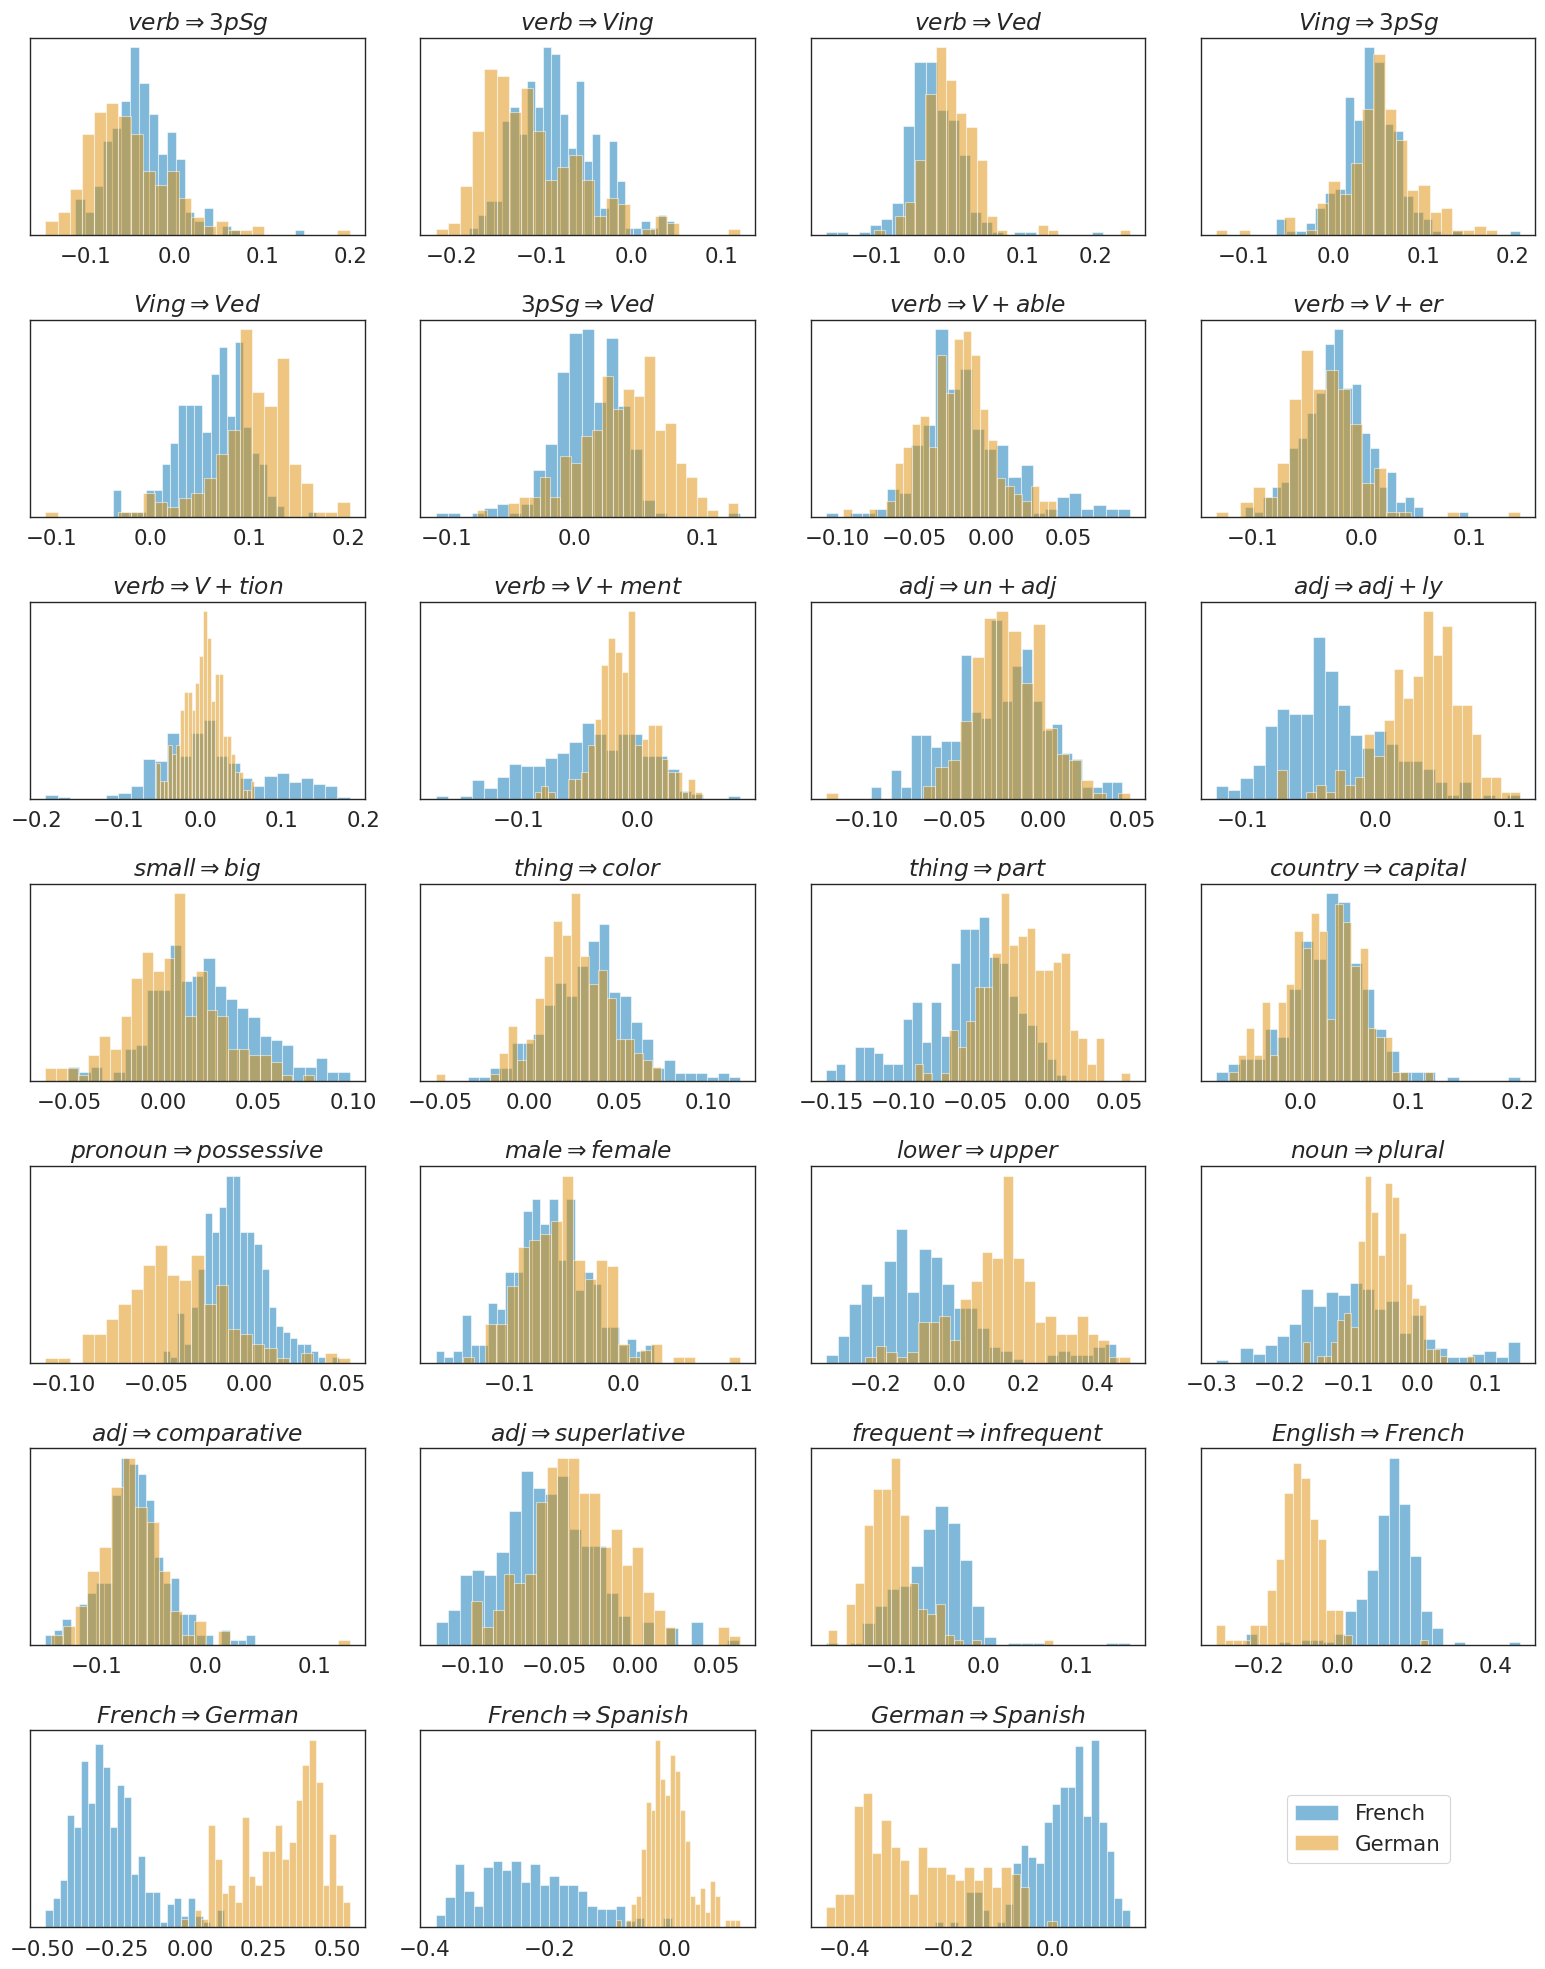

In [4]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[1])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "French", target = "German", alpha = 0.5)

20it [01:00,  3.04s/it]


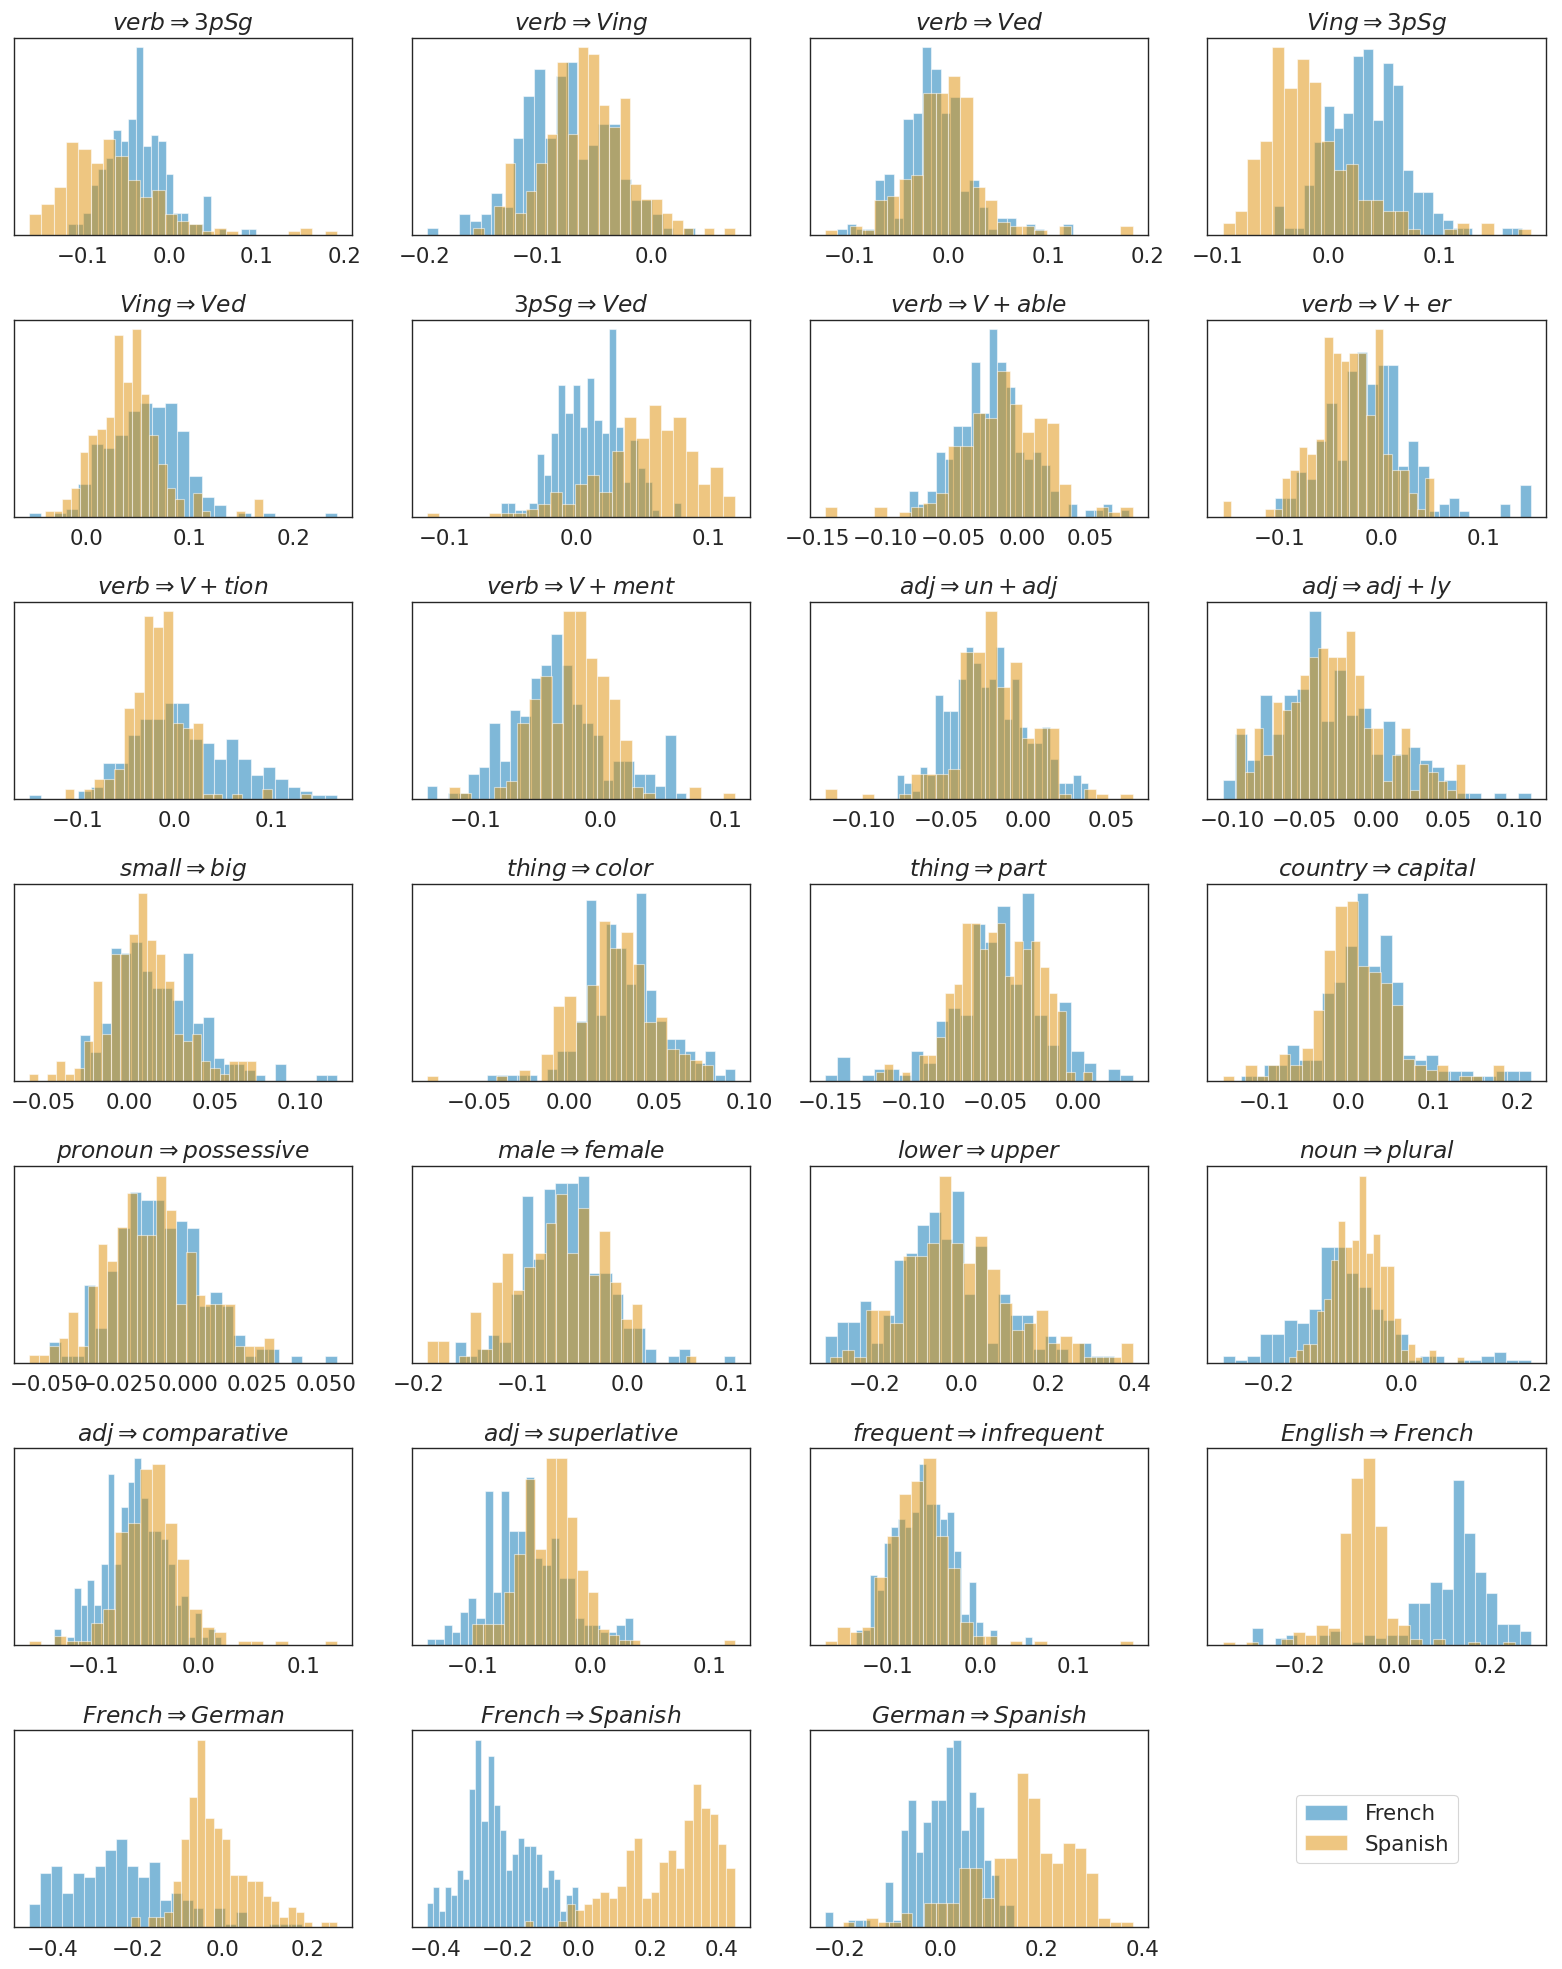

In [5]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[2])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "French", target = "Spanish", alpha = 0.5)

20it [01:06,  3.33s/it]


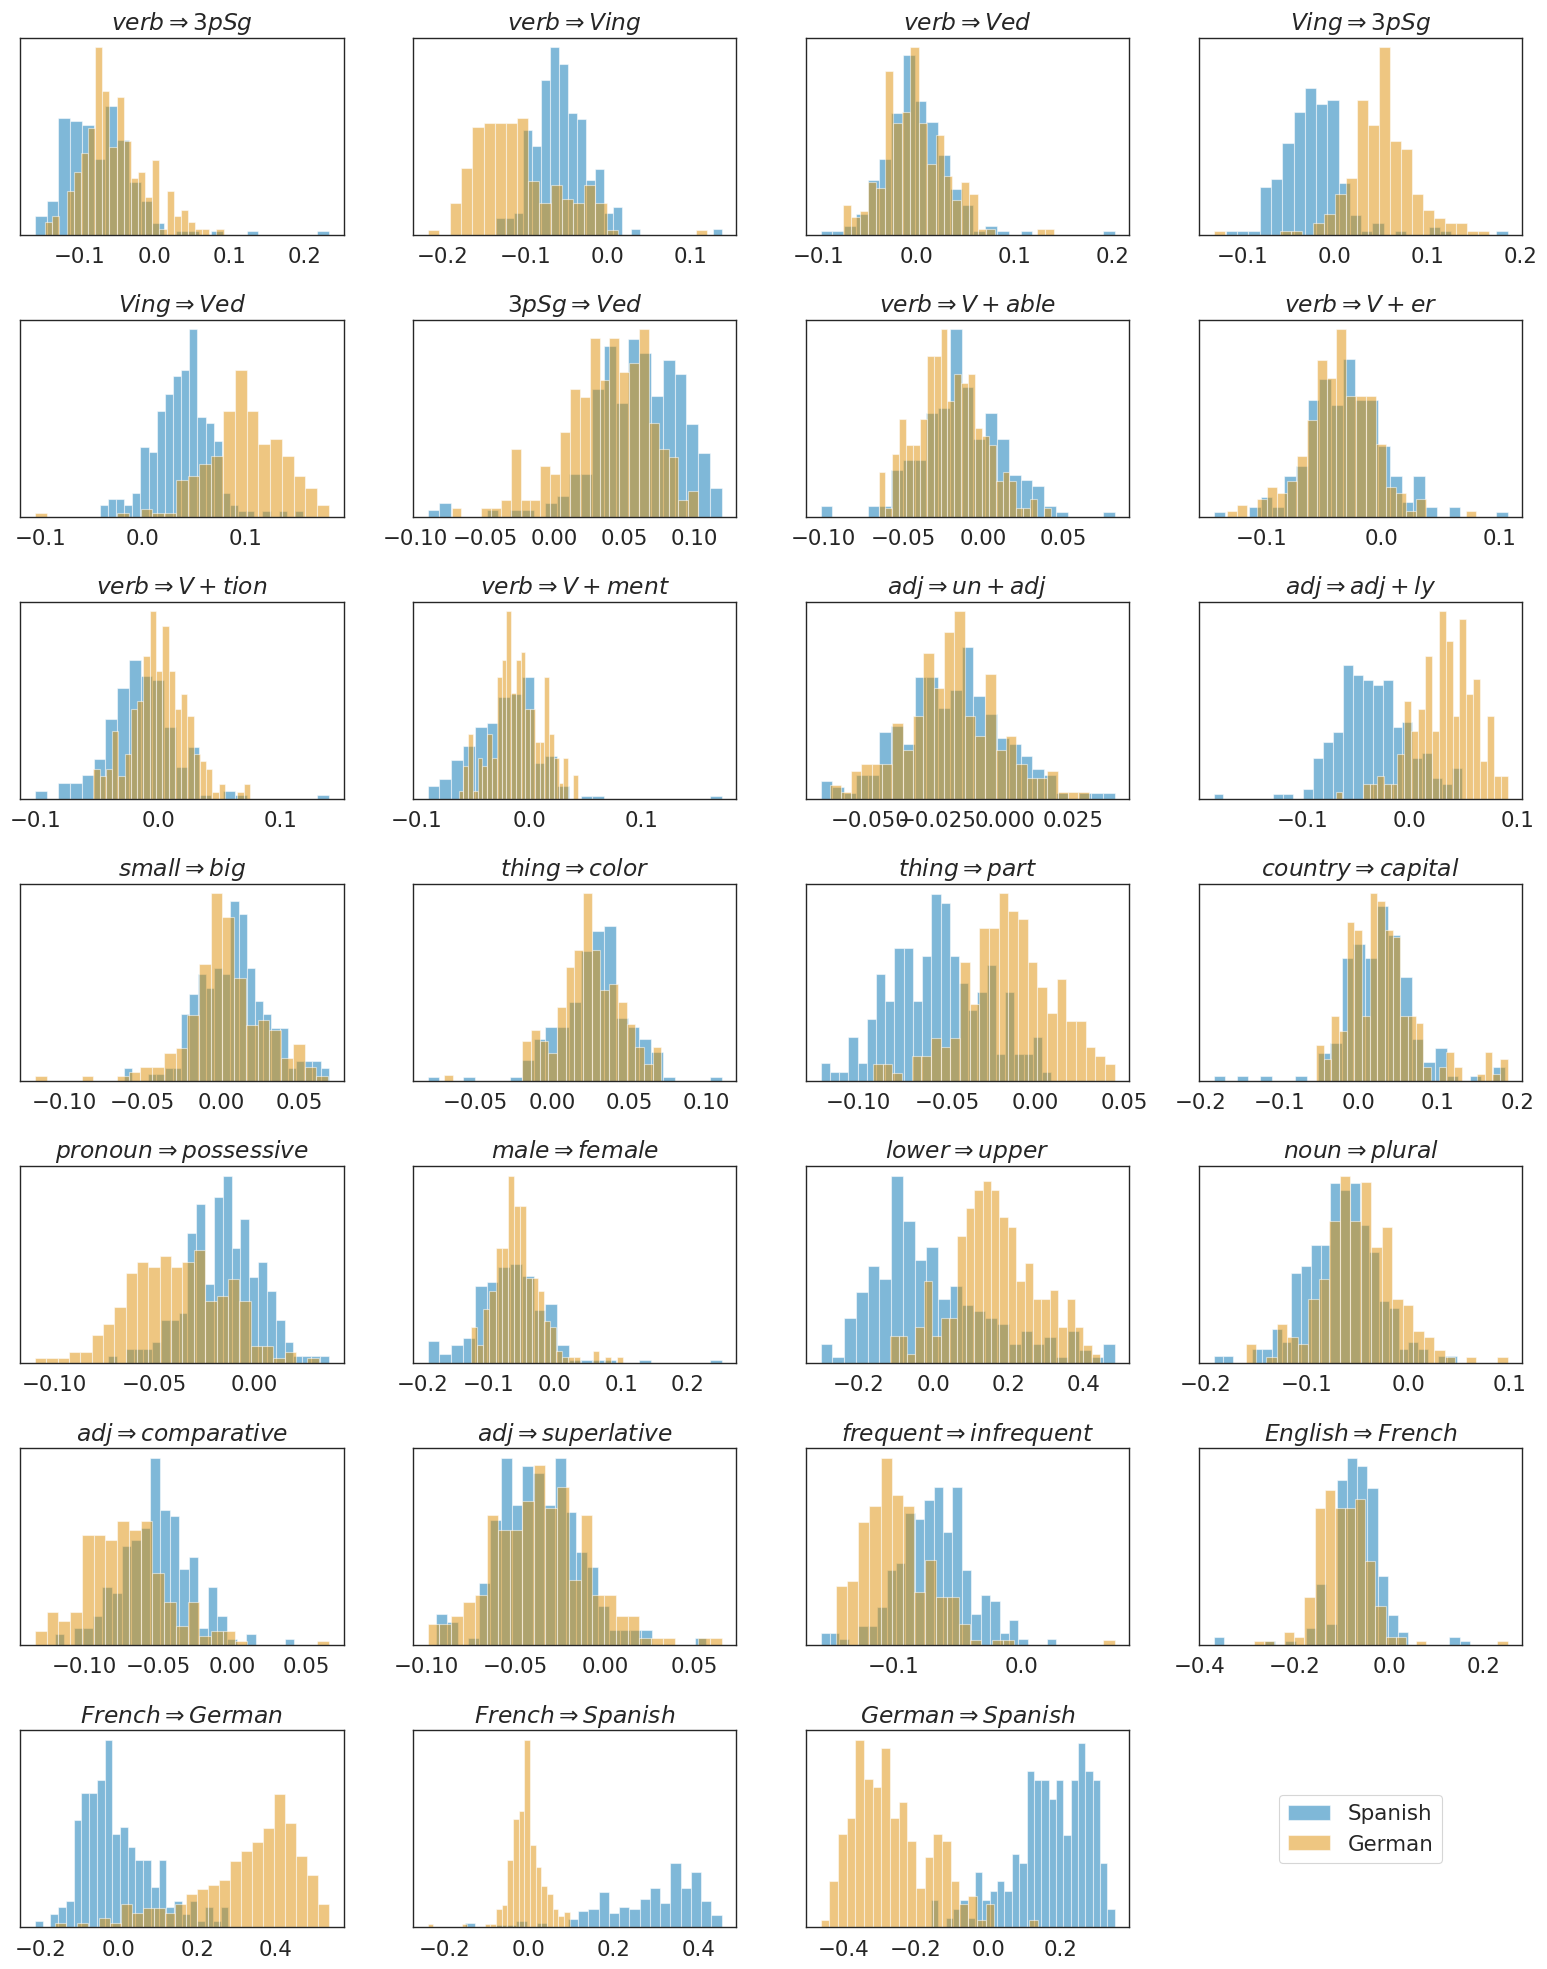

In [6]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[3])
lrg.hist_measurement(lambda_0 @ sqrt_Cov_gamma, lambda_1 @ sqrt_Cov_gamma, concept_g,
                    concept_names, base = "Spanish", target =  "German", alpha = 0.5)